# plain bar chart for the taxonomy prediction result

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../15_n_genus/afesm30_repseq_foldseek_clu_nonsingleton_allMem_lca_blacklist-count_taxGroup.tsv", delimiter="\t", \
                 names=['count', 'taxGroup'], header=None)

In [ ]:
df

,count,taxGroup
0,2283970,superkingdom
1,1198802,root
2,529253,lower than superkingdom
3,515945,cellular organism
4,216786,species and lower than species
5,199879,not predicted
6,181564,family and lower than family


In [6]:
"+".join(list(map(str, df['count'])))

'2283970+1198802+529253+515945+216786+199879+181564'

In [9]:
1198802+515945

1714747

In [4]:
a = """species and lower than species
family and lower than family
lower than superkingdom
superkingdom
root
cellular organism""".split("\n")
print(a)

['species and lower than species', 'family and lower than family', 'lower than superkingdom', 'superkingdom', 'root', 'cellular organism']


In [5]:
custom_order = ['not predicted', 'root', 'cellular organism', 'superkingdom', 'lower than superkingdom', 'family and lower than family', 'species and lower than species',   ]
df = pd.merge( df, pd.DataFrame({'taxGroup': custom_order}), on='taxGroup', how='right').fillna(0)
df['count'] = df['count'].astype(int)

# Convert 'taxGroup' column to a categorical type with the specific order
df['taxGroup'] = pd.Categorical(df['taxGroup'], categories=custom_order[::-1], ordered=True)

# Sort the DataFrame based on the custom order
df = df.sort_values('taxGroup')

In [6]:
df['count'] = df['count'].div(1000)

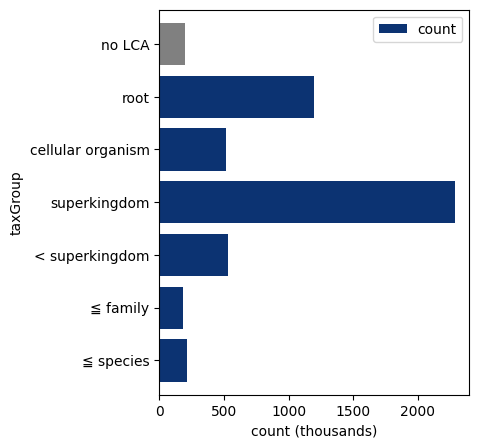

In [7]:

ax = df.plot.barh(y='count', x='taxGroup', figsize=(4, 5), color=['#0C3372' for _ in range(6)] + ['gray'], width=0.8)
ax.set_yticklabels(['no LCA', 'root', 'cellular organism', 'superkingdom', '< superkingdom', '≦ family', '≦ species',   ][::-1],)

plt.xlabel('count (thousands)')
plt.savefig('taxpred.svg')
# plt.title('Taxonomy of LCAs of non-singleton clusters')

In [ ]:
~/share/afesm6/15_n_genus/tax_lca$ grep -E "Bacteria|Eukaryota|Archaea|Viruses" afesm30_repseq_foldseek_clu_nonsingleton_allMem_lca_blacklist_report | head
54.5975 2798779 2122871 superkingdom    4000002     Bacteria
7.1871  368424  150851  superkingdom    2759        Eukaryota
0.0010  51      0       no rank 2683617       Eukaryota incertae sedis
0.6375  32681   9589    superkingdom    4137846     Archaea
0.2280  11689   659     superkingdom    10239     Viruses
0.0000  1       1       species 762905            Hyperthermophilic Archaeal Virus 1

In [12]:
b=2798779
euk=368424
arc=32681
vir=11689

nums = [b, euk, arc, vir]
s = sum(nums)

In [21]:
for ele in nums:
  print(ele/s*100)

87.14667236273316
11.47176165698242
1.0176010322667428
0.3639649480176848


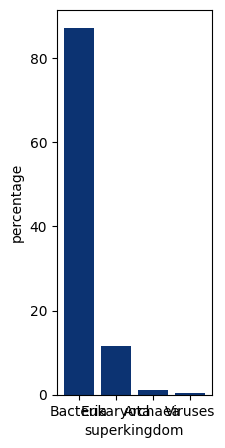

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 5))
plt.bar(['Bacteria', 'Eukaryota', 'Archaea', 'Viruses'], [b/s*100, euk/s*100, arc/s*100, vir/s*100], color='#0C3372')
plt.ylabel('percentage')
plt.xlabel('superkingdom')
plt.savefig('output/superkingdom_specific.svg')